In [37]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
# Step1: Import all libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step2: Load the data

# Step2.1: Read the “housing.csv” file from the folder into the program

housingData = pd.read_csv('/content/sample_data/california_housing_train.csv')
housingData.head() # Lấy một vài dữ liệu đầu 
housingData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [39]:

#In một vài hàng của dữ liệu này 
print('Print first few rows of this data - ')
print()
print(housingData)


Print first few rows of this data - 

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       popula

In [40]:
housingData.describe()
#it shows us the count of each value, the mean of each value, standard deviation, percentiles and min/max values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


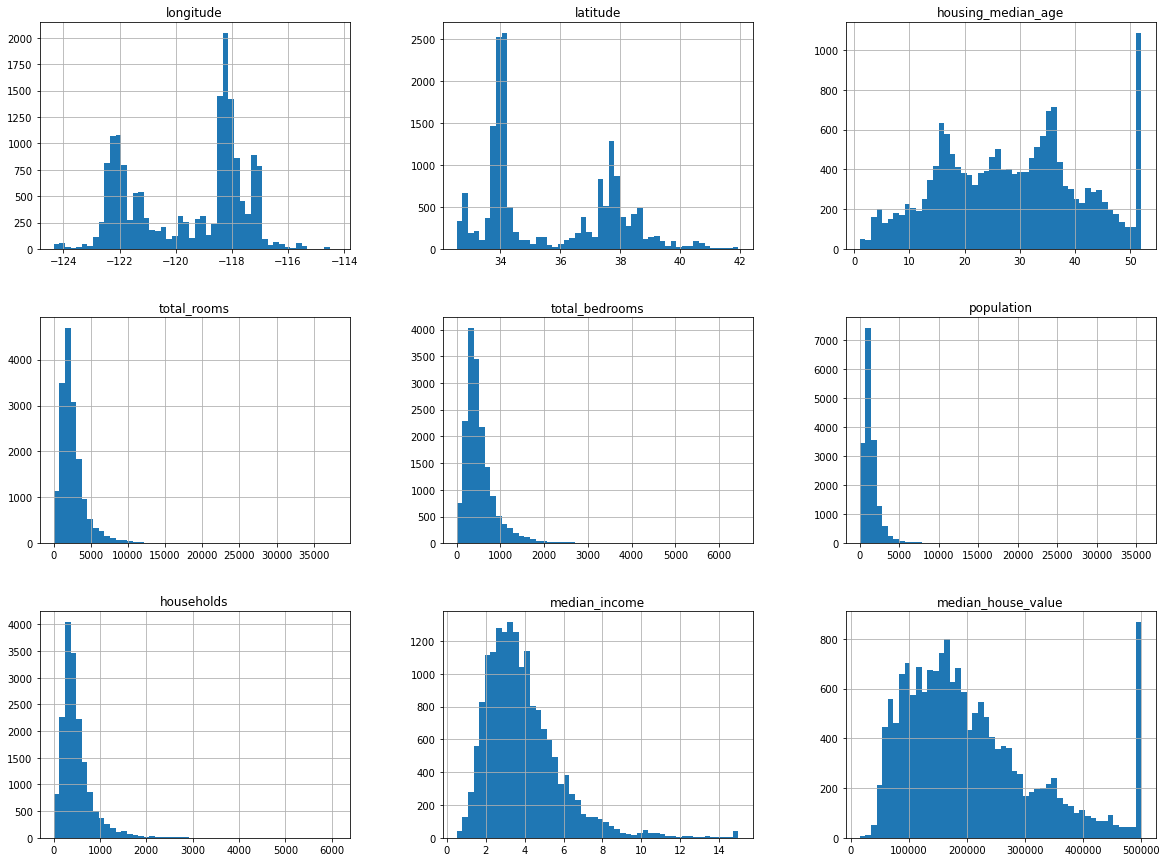

In [41]:
import matplotlib.pyplot as plt
housingData.hist(bins=50, figsize=(20,15))
plt.show() #optional

In [42]:
# Load the data
#Trích xuất dữ liệu đầu vào X và dữ liệu đầu vào Y 
X = housingData.iloc[:, :-1].values
y = housingData.iloc[:, [-1]].values
print(X)
#.iloc[] chấp nhận các index dựa trên 0 của các row và column và trả về Chuỗi hoặc Dữ liệu. 
#Bạn có thể sử dụng nó để lấy toàn bộ row hoặc column hoặc các phần của chúng.
#Dấu : đầu tiên là trả về giá trị của tất cả các hàm 
# [:, :-1] trả về trừ hàng cuối cùng 
print(y)  #[:, [-1]] trả vê giá trị của cột cuối cùng của tất cả các hàng 

[[-114.31     34.19     15.     ... 1015.      472.        1.4936]
 [-114.47     34.4      19.     ... 1129.      463.        1.82  ]
 [-114.56     33.69     17.     ...  333.      117.        1.6509]
 ...
 [-124.3      41.84     17.     ... 1244.      456.        3.0313]
 [-124.3      41.8      19.     ... 1298.      478.        1.9797]
 [-124.35     40.54     52.     ...  806.      270.        3.0147]]
[[ 66900.]
 [ 80100.]
 [ 85700.]
 ...
 [103600.]
 [ 85800.]
 [ 94600.]]


In [52]:
# Handle missing values ~  Xử lý các dữ liệu còn thiếu
# Fill the missing values with the mean of the respective column ~ 

from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
missingValueImputer = SimpleImputer()
X[:, :-1] = missingValueImputer.fit_transform(X[:, :-1])
y = missingValueImputer.fit_transform(y)
print(y)


[[ 66900.]
 [ 80100.]
 [ 85700.]
 ...
 [103600.]
 [ 85800.]
 [ 94600.]]


Lưu ý không sử dụng :

```
# from sklearn.preprocessing import Imputer 
thay vì đó sử dụng 
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Missing values is represented using NaN and hence specified. If it 
is empty field, missing values will be specified as ''




In [55]:
# Step4: Encode categorical data: 
# Convert categorical column in the dataset to numerical data

from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X[:, -1] = X_labelencoder.fit_transform(X[:, -1])
print(X[:, -1] )

[ 539. 1106.  781. ... 3901. 1404. 3850.]


In [56]:
# Step5: Split the dataset: Split the data into 
# 80% training dataset and 20% test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
print(X_train, X_test, y_train, y_test)

[[ -121.41    38.57    16.   ...  1538.     960.    4492.  ]
 [ -118.44    34.19    19.   ...  2278.     835.    3055.  ]
 [ -122.26    37.77    52.   ...   637.     297.    7459.  ]
 ...
 [ -119.71    36.88    17.   ...   992.     312.   10183.  ]
 [ -120.7     35.28    14.   ...  1884.     664.    7191.  ]
 [ -117.69    33.59    13.   ...  1432.     431.   10604.  ]] [[-1.1795e+02  3.3840e+01  1.8000e+01 ...  1.9610e+03  7.7300e+02
   5.3790e+03]
 [-1.1792e+02  3.4080e+01  3.6000e+01 ...  7.4100e+02  2.4500e+02
   6.7170e+03]
 [-1.1780e+02  3.3830e+01  1.7000e+01 ...  1.1800e+03  3.4600e+02
   1.1088e+04]
 ...
 [-1.2216e+02  3.7750e+01  4.6000e+01 ...  4.2900e+02  1.5400e+02
   3.6510e+03]
 [-1.1978e+02  3.6860e+01  8.0000e+00 ...  1.6040e+03  6.2600e+02
   6.5500e+03]
 [-1.1902e+02  3.5330e+01  2.6000e+01 ...  2.0720e+03  8.2700e+02
   1.8150e+03]] [[190700.]
 [215500.]
 [351800.]
 ...
 [165200.]
 [239900.]
 [348100.]] [[171400.]
 [189600.]
 [500001.]
 ...
 [142900.]
 [128300.]
 [ 8

In [46]:
# Step6: Standardize data: Standardize training and test datasets

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)


# ***Task1: Perform Linear Regression***

In [47]:
# Task1.1: Perform Linear Regression on training data

from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

LinearRegression()

In [48]:
# Task1.2: Predict output for test dataset using the fitted model

predictionLinear = linearRegression.predict(X_test)

# Task1.3: Print root mean squared error (RMSE) from Linear Regression

from sklearn.metrics import mean_squared_error
mseLinear = mean_squared_error(y_test, predictionLinear)
print('Root mean squared error (RMSE) from Linear Regression = ')
print(mseLinear)


Root mean squared error (RMSE) from Linear Regression = 
0.38089217295307115


# ***Task2: Perform Decision Tree Regression***

In [49]:
# Task2.1: Perform Decision Tree Regression on training data

from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

# Task2.2: Predict output for test dataset using the fitted model

predictionDT = DTregressor.predict(X_test)

# Task2.3: Print root mean squared error from Decision Tree Regression

from sklearn.metrics import mean_squared_error
mseDT = mean_squared_error(y_test, predictionDT)
print('Root mean squared error from Decision Tree Regression = ')
print(mseDT)


Root mean squared error from Decision Tree Regression = 
0.3387787594739005


# **Task3: Perform Random Forest Regression**

In [50]:
# Task3.1: Perform Random Forest Regression on training data

from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor()
RFregressor.fit(X_train, y_train)

# Task3.2: Predict output for test dataset using the fitted model

predictionRF = RFregressor.predict(X_test)

# Task3.3: Print root mean squared error from Random Forest Regression

from sklearn.metrics import mean_squared_error
mseRF = mean_squared_error(y_test, predictionRF)
print('Root mean squared error from Random Forest Regression = ')
print(mseRF)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Root mean squared error from Random Forest Regression = 
0.1726673537260133


# **Perform Linear Regression with one independent variable**
Thực hiện hồi quy tuyến tính với một biến độc lập

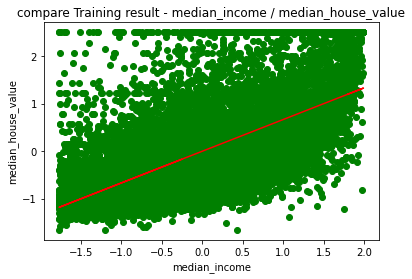

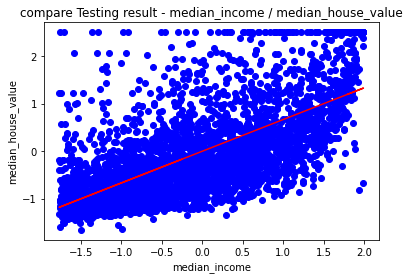

In [53]:
# Task4.1: Extract just the median_income column from the 
# independent variables (from X_train and X_test)

X_train_median_income = X_train[: , [7]]
X_test_median_income = X_test[: , [7]]

# Task4.2: Perform Linear Regression to predict housing values 
# based on median_income

from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_median_income, y_train)

# Task4.3: Predict output for test dataset using the fitted model

predictionLinear2 = linearRegression2.predict(X_test_median_income)

# Task4.4: Plot the fitted model for training data as well as 
# for test data to check if the fitted model satisfies the test data

# Task4.4.1: let us visualize the Training set

plt.scatter(X_train_median_income, y_train, color = 'green')
plt.plot (X_train_median_income, 
          linearRegression2.predict(X_train_median_income), color = 'red')
plt.title ('compare Training result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

# Task4.4.2: let us visualize the Testing set

plt.scatter(X_test_median_income, y_test, color = 'blue')
plt.plot (X_train_median_income, 
          linearRegression2.predict(X_train_median_income), color = 'red')
plt.title ('compare Testing result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()
